In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import torch.nn as nn
import torch.optim as optim

In [ ]:
from training import Coach
from utils import MnistData
from models import ModelManager, ModelType

In [ ]:
data = MnistData()

In [ ]:
simple, momentum, nesterov = [], [], []

In [11]:
for i in range(100):
    print(f'--- ({i}) ---')
    ivan = ModelManager.get_untrained(ModelType.MnistCnnIvan)
    Coach.train(
        ivan,
        data,
        nn.CrossEntropyLoss(reduction='sum'),
        optim.SGD(ivan.parameters(), lr=1e-2),
        30,
        5001,
        5000
    )
    simple.append(Coach.measure_performance(ivan, data))

--- (0) ---
Training started at 1645303065.553907
Epoch 0: 69.06207275390625
Epoch 5000: 44.8350830078125
Training finished at 1645303103.7758129; lasted 38.22190594673157 seconds.
96.35000000000001 % success on test data
--- (1) ---
Training started at 1645303104.9694326
Epoch 0: 69.0570297241211
Epoch 5000: 44.55046463012695
Training finished at 1645303143.982259; lasted 39.012826442718506 seconds.
95.95 % success on test data
--- (2) ---
Training started at 1645303145.0658803
Epoch 0: 69.08260345458984
Epoch 5000: 47.80250549316406
Training finished at 1645303182.8199608; lasted 37.75408053398132 seconds.
87.98 % success on test data
--- (3) ---
Training started at 1645303183.949895
Epoch 0: 68.99569702148438
Epoch 5000: 43.86082458496094
Training finished at 1645303221.7178912; lasted 37.767996311187744 seconds.
95.77 % success on test data
--- (4) ---
Training started at 1645303222.8011417
Epoch 0: 69.05350494384766
Epoch 5000: 45.38423156738281
Training finished at 1645303262.398

In [13]:
for i in range(100):
    print(f'--- ({i}) ---')
    ivan = ModelManager.get_untrained(ModelType.MnistCnnIvan)
    Coach.train(
        ivan,
        data,
        nn.CrossEntropyLoss(reduction='sum'),
        optim.SGD(ivan.parameters(), lr=1e-3, momentum=0.9),
        30,
        5001,
        5000
    )
    momentum.append(Coach.measure_performance(ivan, data))

--- (0) ---
Training started at 1645307206.8385253
Epoch 0: 69.09142303466797
Epoch 5000: 44.21019744873047
Training finished at 1645307246.6778655; lasted 39.83934020996094 seconds.
96.93 % success on test data
--- (1) ---
Training started at 1645307247.759203
Epoch 0: 69.09638977050781
Epoch 5000: 44.90533447265625
Training finished at 1645307286.0001779; lasted 38.24097490310669 seconds.
95.50999999999999 % success on test data
--- (2) ---
Training started at 1645307287.0964346
Epoch 0: 68.98211669921875
Epoch 5000: 44.545013427734375
Training finished at 1645307324.85908; lasted 37.76264548301697 seconds.
96.16 % success on test data
--- (3) ---
Training started at 1645307325.9376843
Epoch 0: 69.01404571533203
Epoch 5000: 46.730812072753906
Training finished at 1645307366.9306893; lasted 40.99300503730774 seconds.
95.95 % success on test data
--- (4) ---
Training started at 1645307368.0128307
Epoch 0: 69.19446563720703
Epoch 5000: 44.88421630859375
Training finished at 1645307412.9

In [15]:
for i in range(100):
    print(f'--- ({i}) ---')
    ivan = ModelManager.get_untrained(ModelType.MnistCnnIvan)
    Coach.train(
        ivan,
        data,
        nn.CrossEntropyLoss(reduction='sum'),
        optim.SGD(ivan.parameters(), lr=1e-3, momentum=0.9, nesterov=True),
        30,
        5001,
        5000
    )
    nesterov.append(Coach.measure_performance(ivan, data))

--- (0) ---
Training started at 1645355148.3192408
Epoch 0: 69.10975646972656
Epoch 5000: 45.82549285888672
Training finished at 1645355198.4065197; lasted 50.087278842926025 seconds.
96.58 % success on test data
--- (1) ---
Training started at 1645355199.5431066
Epoch 0: 69.02880096435547
Epoch 5000: 49.71238327026367
Training finished at 1645355242.493381; lasted 42.95027446746826 seconds.
86.17 % success on test data
--- (2) ---
Training started at 1645355243.572001
Epoch 0: 69.115234375
Epoch 5000: 44.755619049072266
Training finished at 1645355284.041148; lasted 40.469146966934204 seconds.
96.0 % success on test data
--- (3) ---
Training started at 1645355285.0915465
Epoch 0: 69.14059448242188
Epoch 5000: 45.54307556152344
Training finished at 1645355326.5462067; lasted 41.454660177230835 seconds.
87.1 % success on test data
--- (4) ---
Training started at 1645355327.6177416
Epoch 0: 69.03434753417969
Epoch 5000: 44.942665100097656
Training finished at 1645355367.562345; lasted 39

In [ ]:
import matplotlib.pylab as lab

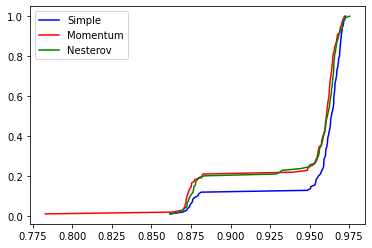

In [18]:
# for performences in [sorted(simple), sorted(momentum), sorted(nesterov)]:
performences = sorted(simple)
distribution = {}
for i in range(1, len(performences) + 1):
    distribution[performences[i - 1]] = i / len(performences)
my_list = distribution.items()
sorted(my_list)
x, y = zip(*my_list)
lab.plot(x, y, color = "blue", label="Simple")

performences = sorted(momentum)
distribution = {}
for i in range(1, len(performences) + 1):
    distribution[performences[i - 1]] = i / len(performences)
my_list = distribution.items()
sorted(my_list)
x, y = zip(*my_list)
lab.plot(x, y, color = "red", label="Momentum")

performences = sorted(nesterov)
distribution = {}
for i in range(1, len(performences) + 1):
    distribution[performences[i - 1]] = i / len(performences)
my_list = distribution.items()
sorted(my_list)
x, y = zip(*my_list)
lab.plot(x, y, color="green", label="Nesterov")

lab.legend()